In [1]:
%%html
<style>
body{
    font-family: "Helvetica Neue"
}

# Project Two: Modeling Thermodynamics

Jasmine Kamdar and Jocelyn Jimenez

In [2]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

## Introduction

As we were looking deeper into the transfer of heat, we were very intrigued by refrigerators- the devices that have helped improve the conservation of temperature sensitive foods. We were very curious as to how refrigerators work and how they might affect the rate at which something maintains its freshness. As we were researching, we learned that the heat from the food is absorbed from the refrigerant in the evaporator and released through the condesors, which helps the food items cool down. 

We decided to test how opening and closing a refrigerator might impact the heat that is absorbed by the refrigerator. For this project specifically, we decided to focus on the change by limiting our module to one item: cheese. 

For our project, we decided to ask the question: How long does it take for the temperature of cheese to change back to refrigerator temperature if we leave a refrigerator door open for a certain amount of time? 


## Initial Values

In order to understand the effects of opening and closing the refrigerator for a long period of time, we created a stock and flow diagram in which our stock is the temperature of the cheese. As a result, our state value was set to 282 Kelvin or 9 degrees Celsius, assuming the cheese is at the same temperature as the inner part of the refrigerator.  


In [21]:
state = State(C=282); #Creating State variables
#C= Temperature of Cheese in Kelvin


There are multiple factors that contribute to the change in temperature of the cheese. For instance, things to consider would be the temperature of the room, the temperature of the refrigerant, the heat transfer coefficient and the surface area of the cheese, as well as  the time span in which the door was opened and closed. The following rates were used for the flow values in the system.

We made three systems to change the surface area of the cheese to also test how size might have an impact on how quickly thermal energy is transferred. The systems have the values for room temperature, the temperature of the refrigerant, the heat transfer coefficient and the time span stayed the same. We decided   

In [22]:
system1 = System(init_out_temp = 298, 
                    #Initial Outside Temperature in Kelvin
                hc = .418, 
                    #Heat Transfer Coefficient Cheese
                timetot = 30, 
                    #The amount of Time the door is open
                init_refrigerant_temp = 282, 
                    #Initial refrigerant temperature in Kelvin,
                dt=1, 
                    #time step
                ac=0.028, 
                    #Surface area of cheese in meters
                t0=0
               ); 

In [23]:
system2 = System(init_out_temp = 298, 
                    #Initial Outside Temperature in Kelvin
                hc = .418, 
                    #Heat Transfer Coefficient Cheese
                timetot = 30, 
                    #The amount of Time the door is open
                init_refrigerant_temp = 282, 
                    #Initial refrigerant temperature in Kelvin,
                dt=1, 
                    #time step
                ac=.056, 
                    #Surface area of cheese in meters
                t0=0
               ); 

In [24]:
system3 = System(init_out_temp = 298, 
                    #Initial Outside Temperature in Kelvin
                hc = .418, 
                    #Heat Transfer Coefficient Cheese found from Source #1
                timetot = 30, 
                    #The amount of Time the door is open
                init_refrigerant_temp = 282, 
                    #Initial refrigerant temperature in Kelvin,
                dt=1, 
                    #time step
                ac=0.112, 
                    #Surface area of cheese in meters
                t0=0
               ); 
               

## Modeling the Transfer of Heat 

The transfer of thermal energy through convection can be calculated by utilizing the equation Q=hA(T2-T1). In the equation, Q represents heat transfer, h is heat transfer coefficient, A stands for surface area, and T2-T1 is the difference between the temperatures of the outside fluid and that of the main subject (cheese). We based our model on the following equation twice: 


In [25]:
def update_func1(state, system): #creates function for the change in each of the State variables
    
    C=state.C
    
    unpack(system) 
    #unpacks the system so we don't have to use "system."
    
    dC = hc*ac*(init_out_temp-C)
    #heat transfer equation from the outside air to the cheese

    #applies the heat transfer equation to the temperature of the cheese
    C += dC*dt
    
    return  State(C=C)


Update_func1 represents the change in temperature of the cheese when we open the fridge. During this time the thermal energy from the outside air transfers to the inside. For the simplicity of the model, we are assuming that once the refrigerator door is opened, the refrigerator gets turned off and there is a nearly instantaneous transfer of heat from outside air to inside air. We used outside air as T2 because it would be considered the surrounding fluid and the state variable, cheese temperature, as T1 because it is the solid object. 


In [26]:
def update_func2(state, system): #creates function for the change in each of the State variables
   
    C=state.C
    
    unpack(system)
    #unpacks the system so we don't have to use "system."

    
    #new_state = state
    #equation that affect the change in the State variable
    dC = hc*ac*(init_refrigerant_temp-C)
    #heat transfer from the cheese to the refrigerant air  

    #applies the heat transfer equation to the temperature of the cheese
    C += dC*dt
    
    return  State(C=C)

Update_func2 represents the change in temperature of the cheese when we close the fridge. Again for the simplicity of the model, we are assuming that once the refrigerator door is closed, there is a nearly instantaneous transfer of heat from the inside air to the refrigerant liquid in the evaporator tubes. We used the set refrigerator air temperature as T2 because it is the surrounding fluid and the state variable cheese temperature as T1 because it is the solid object. 

## Running the Simulation

Next, we created two run_simulations that both created time frames. The first run simulation ran the update_func1 (refrigerator door open) for 60 min and then ran update_func2 for 140 minutes. We chose these numbers because when we ran the simulation with our medium sized surface area, those were the approximate times it took the temperature to level out.  

In [27]:
def run_simulation(system, update_func1, update_func2): 
    #Runs a simulation of the system and retuns and a Time Frame
    
    unpack(system)
    #unpacks the system so we don't have to use "system."

    frame = TimeFrame(columns=state.index)
    frame.row[t0] = state
    
    for t in linrange(t0, 60, dt):
        frame.row[t+dt] = update_func1(frame.row[t], system) 
        #Runs update_func1 in the time interval 60-200
    for t in linrange(60,200,dt):
        frame.row[t+dt] = update_func2(frame.row[t], system) 
        #Runs update_func2 in the time interval 60-200
    return frame

The second run simulation shows a model if we were to open and close the refrigerator for 5 minute intervals for the first hour and then leave it closed 140 min. We did this because we wanted to see how this affected the rate the cheese gained thermal energy and the difference in temperature at the end of 60 min and 200 min. This is something interesting to look at for restaurants or food services to see the value in closing the refrigerators for short periods of time for the wellness of the foods within. 

In [28]:
def run_simulation2(system, update_func1, update_func2): 
    #Runs a simulation of the system and retuns and a Time Frame
    
    unpack(system)
    #unpacks the system so we don't have to use "system."

    frame = TimeFrame(columns=state.index)
    frame.row[t0] = state
    
    for t in linrange(t0, 5, dt):
        frame.row[t+dt] = update_func1(frame.row[t], system) 
        #Runs update_func1 in the time interval 5-10
    for t in linrange(5,10,dt):
        frame.row[t+dt] = update_func2(frame.row[t], system) 
        #Runs update_func2 in the time interval 5-10
    for t in linrange(10,15,dt):
        frame.row[t+dt] = update_func1(frame.row[t], system) 
        #Runs update_func2 in the time interval 10-15
    for t in linrange(15, 20, dt):
        frame.row[t+dt] = update_func2(frame.row[t], system) 
        #Runs update_func1 in the time interval 15-20
    for t in linrange(20,25,dt):
        frame.row[t+dt] = update_func1(frame.row[t], system) 
        #Runs update_func2 in the time interval 20-25
    for t in linrange(25, 30, dt):
        frame.row[t+dt] = update_func2(frame.row[t], system) 
        #Runs update_func1 in the time interval 25-30
    for t in linrange(30,35,dt):
        frame.row[t+dt] = update_func1(frame.row[t], system) 
        #Runs update_func2 in the time interval 30-35
    for t in linrange(35,40,dt):
        frame.row[t+dt] = update_func2(frame.row[t], system) 
        #Runs update_func2 in the time interval 35-40
    for t in linrange(40,45,dt):
        frame.row[t+dt] = update_func1(frame.row[t], system) 
        #Runs update_func2 in the time interval 40-45
    for t in linrange(45, 50, dt):
        frame.row[t+dt] = update_func2(frame.row[t], system) 
        #Runs update_func1 in the time interval 45-50
    for t in linrange(50,55,dt):
        frame.row[t+dt] = update_func1(frame.row[t], system) 
        #Runs update_func2 in the time interval 50-55
    for t in linrange(55, 200, dt):
        frame.row[t+dt] = update_func2(frame.row[t], system) 
        #Runs update_func1 in the time interval 55-60
    return frame

### Results

In our model we considered how the surface area might affect the rate at which the cheese heats up and cools down. In the first graph it can be seen that an object with a greater surface area tends to change temperature at a faster rate, or transfer thermal energy faster. To back up our model, source two  explains how the greater the surface area the more surface  particles there are to conduct heat. 

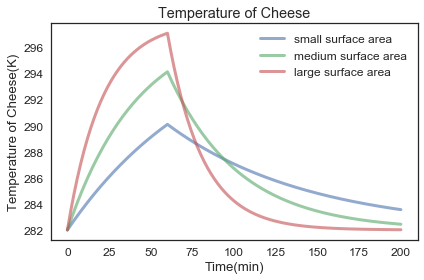

In [11]:
results1_1 = run_simulation(system1, update_func1, update_func2)
results2_1 = run_simulation(system2, update_func1, update_func2) 
results3_1 = run_simulation(system3, update_func1, update_func2) 
plot(results1_1.C, label = "small surface area") 
plot(results2_1.C, label = "medium surface area")
plot(results3_1.C, label = "large surface area")
decorate (title= "Temperature of Cheese",
          xlabel="Time(min)",
          ylabel="Temperature of Cheese(K)")
#plots C while keeping cheese in for extended time

Our 5 minute interval test showed how much the final temperature can be affected if you do close the fridge for those 5 minutes. We can see how this affect actually changes with the different surface areas. In the small surface area of cheese there is a 4 degree difference between leaving the fridge open and intervalling opening and closing the fridge. In the large surface area cheese there is little difference because the cheese can easily gain and give off thermal energy. 

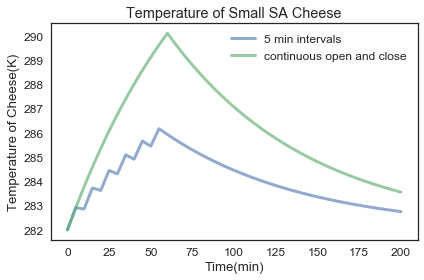

In [12]:
results1_2 = run_simulation2(system1, update_func1, update_func2) 
results1_1 = run_simulation(system1, update_func1, update_func2)
plot(results1_2.C, label = "5 min intervals")
plot(results1_1.C, label = "continuous open and close")
decorate (title= "Temperature of Small SA Cheese",
          xlabel="Time(min)",
          ylabel="Temperature of Cheese(K)")
#plots C for small SA comparing interval and continous openings

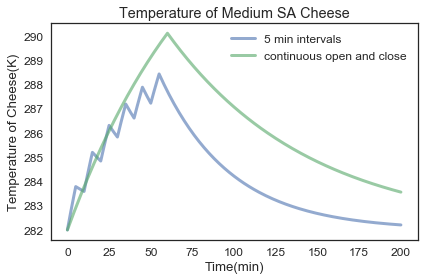

In [13]:
results2_2 = run_simulation2(system2, update_func1, update_func2) 
results2_1 = run_simulation(system1, update_func1, update_func2)
plot(results2_2.C, label = "5 min intervals")
plot(results2_1.C, label = "continuous open and close")
decorate (title= "Temperature of Medium SA Cheese",
          xlabel="Time(min)",
          ylabel="Temperature of Cheese(K)")
#plots C for medium SA comparing interval and continous openings

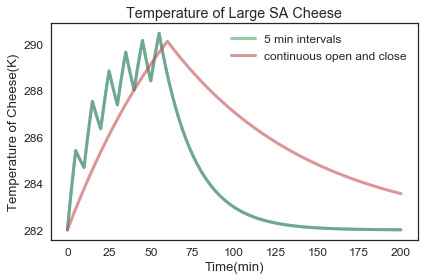

In [14]:
results2 = run_simulation2(system3, update_func1, update_func2) 
plot(results2.C)
decorate (title= "Temperature of Cheese (In and Out of Fridge 5min Intervals)",
          xlabel="Time(min)",
          ylabel="Temperature of Cheese(K)")

results3_2 = run_simulation2(system3, update_func1, update_func2) 
results3_1 = run_simulation(system1, update_func1, update_func2)
plot(results3_2.C, label = "5 min intervals")
plot(results3_1.C, label = "continuous open and close")
decorate (title= "Temperature of Large SA Cheese",
          xlabel="Time(min)",
          ylabel="Temperature of Cheese(K)")
#plots C for large SA comparing interval and continous openings

A cause for errors in our model is the fact that we made the assumption that the air in the refrigerator was not losing thermal energy due to the evaporators while the refrigerator was open. This means that the air in the inside of the fridge was not instantly equal to the outside temperature. Another reason why our model may have some errors is because we did not take into account the conduction of the cheese and the shelf and only took into account the convection.


### Our Experiment 

In order to have something to generally validate our model, we decided to make part of the experiment ourselves. We focused in on the medium surface area and run_simulation1. We measured the temperature of the cheese in the opened/closed (for extended period of time) refrigerator. We took data every 5 minutes because taking data every minute would be impractical with the thermometer we were using. The initial temperature of the cheese was approximately 282.4 Kelvin. We left the refrigerator open for a total of an hour. After minute 60, we closed the fridge and measured the change in temperature every five minutes. This can be seen in the graph below. 

In [15]:
from pandas import read_csv

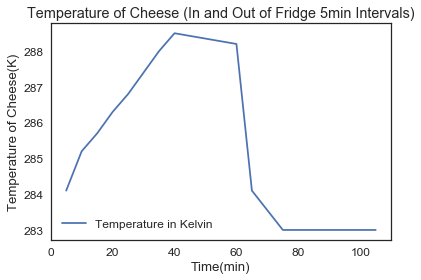

In [16]:
filename = 'cheese_experiment.csv'
tables = read_csv(filename, header=0, index_col=0)
len(tables)
tables.columns = ['Temperature in Kelvin']

tables.plot()

decorate (title= "Temperature of Cheese (In and Out of Fridge 5min Intervals)",
          xlabel="Time(min)",
          ylabel="Temperature of Cheese(K)")

There were a few issues with our experiment. To begin, the thermometer we used was unreliable in that it took a long time to adjust. Additionally, we were very confused at first as to why the temperature was not changing as expected. We later realized (after gathering 3 data points), that we did not have the room at typical “room temperature”. The room was at 12.7 degrees Celsius (or 55 degrees Fahrenheit). We decide to move the thermostat midway through our project up to 25 degrees Celsius (which is the average room temperature). 

We can see that the there is a similar trend in the way that the cheese heated up and cooled down in the experiment which supports our model. Because we saw that our model generally worked as it should in real life, we did not find it practical to test all of our different models that we made. 

### Conclusion

Our model answered our question on how temperature changes with different amount of refrigerator opening and closing times and different surface areas. The larger the surface area, the faster heat transferred out or into the cheese. Because of this, the effect of opening and closing the refrigerator in intervals of 5 minutes changed for different surfaced area cheeses. The larger surfaced area cheeses ended with a greater effect of opening and closing because it cools down and heats up slower.  

### Sources

http://www.foodeng.wisc.edu/images/publications/2001-6.pdf (cheese heat coefficient)
https://www.physicsclassroom.com/class/thermalP/Lesson-1/Rates-of-Heat-Transfer (surface area interpretation)
https://en.wikipedia.org/wiki/Heat_transfer_coefficient (Heat transfer coeeficient)
https://www.fda.gov/food/resourcesforyou/consumers/ucm253954.htm (Basic Refrigerator Information)
